In [1]:
import os
import re

import numpy as np
import pandas as pd
import pymorphy2
from PIL import Image
from matplotlib import pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud, ImageColorGenerator

from stop_words import *




russian_stopwords = stopwords.words("russian")  + stop_words_1+ stop_words_2

morph = pymorphy2.MorphAnalyzer()

In [32]:
normal = lambda x:  morph.parse(x)[0].normal_form

def preproc(text, **kwargs):
    text = text.lower().replace("ё", "е")
    text = re.sub(r'[^а-яА-Я]', ' ', text)
    text = re.sub(r'\-\s\r\n\s{1,}|\-\s\r\n|\r\n', '', text) #deleting newlines and line-breaks
    text = re.sub('[,:;%©?*!@#$%^&()\d]|[+=]|[[]|[]]|[/]|"|\s{2,}|-', ' ', text) 
    if kwargs:
        text = [normal(word) for word in text.split()]
        text = [word for word in text if word not in russian_stopwords and len(word)> 3]
    else:
        text = [word for word in text.split() if word not in russian_stopwords and len(word)> 3]
    return ' '.join(text)
    
    
    
    
    


In [ ]:
# created_at, tweet 
data = pd.read_csv(r'GrotterZero.csv')
print(data.columns)
data_tweet = data['tweet'].apply(preproc)


In [68]:
data_tweet

0                                        получила диплома
1         интересно глянуть твиттера завтра скрипт писать
2                                               прям жиза
3                            правдой бороться банальности
4           вместе ванильный трансформер ладно астановите
                              ...                        
1157    общем некого посталкерить ладно завтра поеду море
1158    самое лольное завела твиттер узнаешь вахахаах ...
1159                                             твитнула
1160                      вспомнила откуда ожога заживают
1161    завела твиттер наверное следующий этак завести...
Name: tweet, Length: 1162, dtype: object

In [63]:
listmerge=lambda ll: [el for lst in ll for el in lst]
data_tweet
' '.join(data_tweet.values)

'получила диплома интересно глянуть твиттера завтра скрипт писать прям жиза правдой бороться банальности вместе ванильный трансформер ладно астановите цитата точно слышала дома стоит сироп ванильный кофе вкусом ванили холодильнике лежит ванильное мороженое отношения напоминают ваниль стоп должна ванильная гифка полного комплекта положил рюкзак кухне продукты выгружал протрите лежал рюкзак соболячие визги ненависти улицы положила ботиночки миллиметров постилки класть ботиночки протри помощью тряпочки хлоргексидина положила рюкзак кухне соболь протри отнеси коридор рюкзак концовка странная эмоций слушай кайфовые камушки  итоге переборола страх впервой видеть фильмы думаешь наверное князь тьмы фильм прям мега страшный музыка страшного кино смотреть наверное телепередача сниться идея посылают послания интересная жуткая жиза диза жиза заснуть завариваешь ложки лаванды роза одна ложка матэ чувствуется хочется спать этооо жестоко поспоришь призадуматься королева взрослая принцесса поспоришь л

In [55]:
data_tweet


0                                        получила диплома
1         интересно глянуть твиттера завтра скрипт писать
2                                               прям жиза
3                            правдой бороться банальности
4           вместе ванильный трансформер ладно астановите
                              ...                        
1157    общем некого посталкерить ладно завтра поеду море
1158    самое лольное завела твиттер узнаешь вахахаах ...
1159                                             твитнула
1160                      вспомнила откуда ожога заживают
1161    завела твиттер наверное следующий этак завести...
Name: tweet, Length: 1162, dtype: object

In [78]:
path_mask = r'images/for_bro.jpg'
char_mask = np.array(Image.open(path_mask))    
image_colors = ImageColorGenerator(char_mask)
wc = WordCloud(background_color="black", max_words=250, width=400, mask=char_mask, height=400,random_state=1, contour_width=3,contour_color='firebrick').generate(' '.join(data_tweet.values))

wc.to_file('creepy_pearl.jpg')

In [42]:
def create_word_cloud(path, path_mask,
                      norm=True,save=True,create_dir=True,
                      stopwords=[],
                      max_words=250):
    data = pd.read_csv(path)
    dir = path.split('.')[0]
    if norm:
        data_tweet = data['tweet'].apply(preproc)
    else:
        data_tweet = data['tweet'].apply(preproc, norm=norm)
    print(data_tweet[5])
    char_mask = np.array(Image.open(path_mask))    
    image_colors = ImageColorGenerator(char_mask)
    wc = WordCloud(background_color="black", max_words=max_words, mask=char_mask, width=400, height=400,random_state=1,
                   stopwords=stopwords).generate(' '.join(data_tweet.values))
    if create_dir:
        if not os.path.isdir(dir):
            os.mkdir(dir)
    if save:
        print(path_mask.split('/')[-1])
        wc.to_file(path_mask.split('/')[-1])
        wc.recolor(color_func=image_colors).to_file(os.path.join(dir, 'orig_'+path_mask.split('/')[-1]))
    plt.figure(figsize=[20,15])
    plt.imshow(wc.recolor(color_func=image_colors))
    print(plt)
    plt.imshow(wc.recolor(color_func=image_colors))
    plt.show()
    # return os.path.join(dir, 'orig_'+path_mask.split('/')[-1])



цитата точно слышала
for_bro.jpg


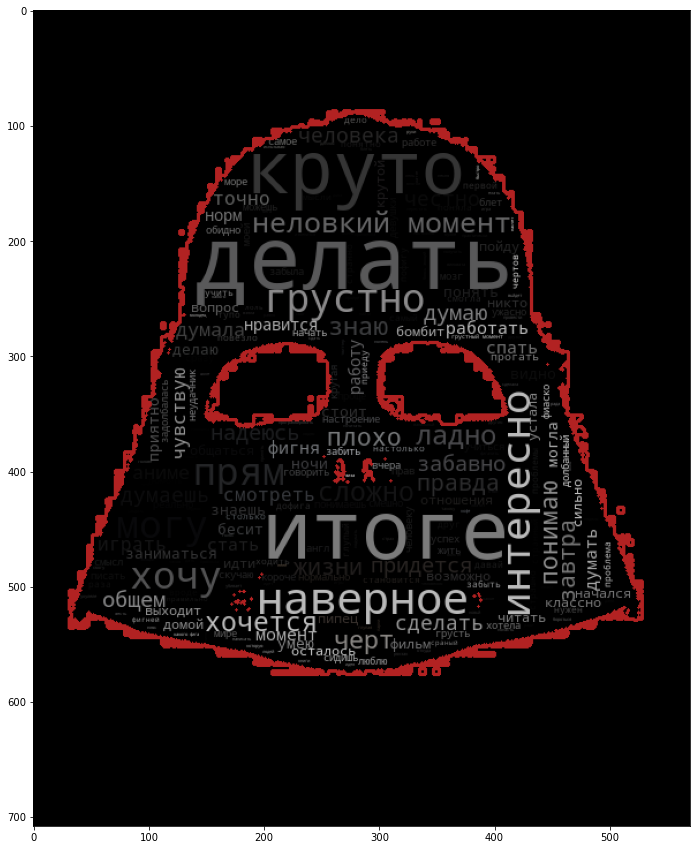

In [80]:
create_word_cloud(r'GrotterZero.csv',r'images/for_bro.jpg', norm=False, max_words=250)

Text(value='', description='Max word:', placeholder='Max words')

Textarea(value='', description='Stop-words', layout=Layout(height='100px', width='600px'), placeholder='Type w…

Checkbox(value=False, description='norm')

Waiting
цитата точно слышала
pngwing.jpg
<module 'matplotlib.pyplot' from 'd:\\git_project\\jupyter_projects\\twitter_word_cloud\\venv\\lib\\site-packages\\matplotlib\\pyplot.py'>
Waiting
цитата точно слышала
pngwing.jpg
<module 'matplotlib.pyplot' from 'd:\\git_project\\jupyter_projects\\twitter_word_cloud\\venv\\lib\\site-packages\\matplotlib\\pyplot.py'>


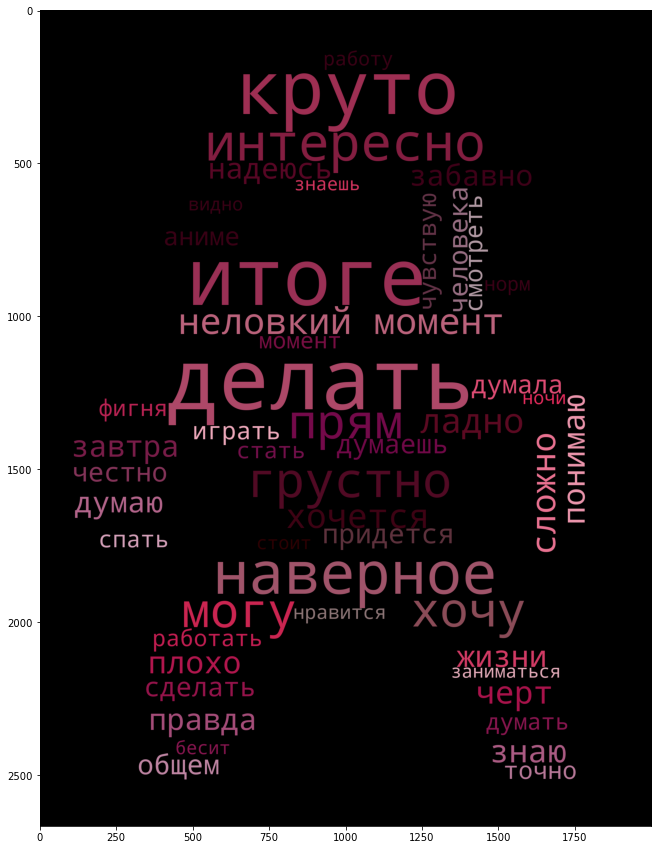

In [46]:
%matplotlib inline
from IPython.display import display, clear_output
from ipywidgets import Textarea, Layout, Button, Output,\
    VBox, FileUpload, Checkbox, Text
button = Button(description='Strat generate')
check_norma = Checkbox(description='norm')

text_area = Textarea(
    description='Stop-words',
    placeholder='Type words with space',
    layout=Layout(width='600px', height='100px')
)
max_words = Text(
    value='',
    placeholder='Max words',
    description='Max word:',
    disabled=False
)
out=Output()
def on_button_clicked(_):
    print('Waiting')
    path_img = create_word_cloud(r'GrotterZero.csv',r'images/pngwing.jpg', norm=not(check_norma.value), 
                                 stopwords=text_area.value.split(' '), max_words=int(max_words.value))
    
button.on_click(on_button_clicked)
display(max_words)
display(text_area, check_norma)
VBox([button])